In [6]:
import requests
from pathlib import Path

# Download telecust100t.csv from github repo
if Path("teleCust1000t.csv").is_file():
  print("Already exists. Skipping download...")
else:
  print("Downloading teleCust1000t.csv")
  request = requests.get("https://raw.githubusercontent.com/Packetouille/machine-learning-research/main/k-nearest-neighbors/teleCust1000t.csv")
  with open("teleCust1000t.csv", "wb") as f:
    f.write(request.content)

Already exists. Skipping download...


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [27]:
X = df.drop(['custcat'], axis = 1) # All other columns
y = df['custcat'] # Labels
print(f"X before preprocessing:\n {X}")
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

print(f"\nX after preprocessing:\n {X}\n")
print(f"X.shape:\n {X.shape}\n")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X before preprocessing:
      region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9    64.0   4       5     0.0   
1         3      11   33        1        7   136.0   5       5     0.0   
2         3      68   52        1       24   116.0   1      29     0.0   
3         2      33   33        0       12    33.0   2       0     0.0   
4         2      23   30        1        9    30.0   1       2     0.0   
..      ...     ...  ...      ...      ...     ...  ..     ...     ...   
995       3      10   39        0        0    27.0   3       0     0.0   
996       1       7   34        0        2    22.0   5       5     0.0   
997       3      67   59        0       40   944.0   5      33     0.0   
998       3      70   49        0       18    87.0   2      22     0.0   
999       3      50   36        1        7    39.0   3       3     0.0   

     gender  reside  
0         0       2  
1         0       6  
2         1       2 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Train Model and Predict
k = 4

neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
y_pred = neigh.predict(X_test)

print(f"Accuracy of model at K=4 is {metrics.accuracy_score(y_test,y_pred)}")

Accuracy of model at K=4 is 0.32


Minimum error:- 0.59, at K = 37


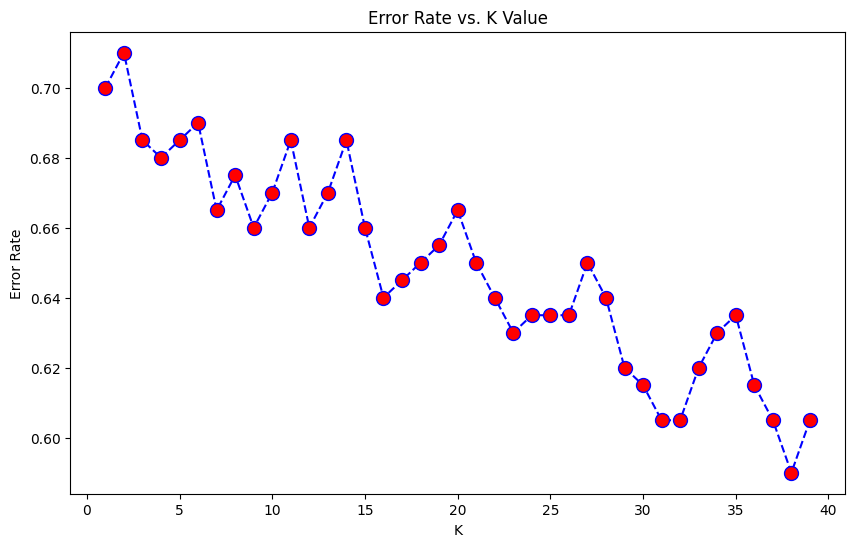

In [34]:
# Improving the model and dinf out the optimal k value
error_rate = []
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  i_pred = knn.predict(X_test)
  error_rate.append(np.mean(i_pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print(f"Minimum error:- {min(error_rate)}, at K = {error_rate.index(min(error_rate))}")

Maximum accuracy:- 0.41, at K = 37


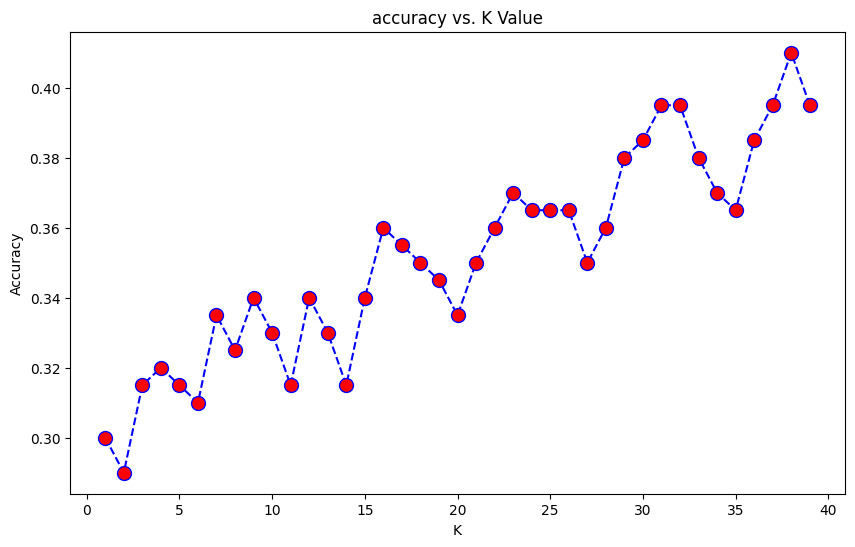

In [35]:
acc = []
from sklearn import metrics
for i in range(1, 40):
  neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  yhat = neigh.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), acc, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print(f"Maximum accuracy:- {max(acc)}, at K = {acc.index(max(acc))}")

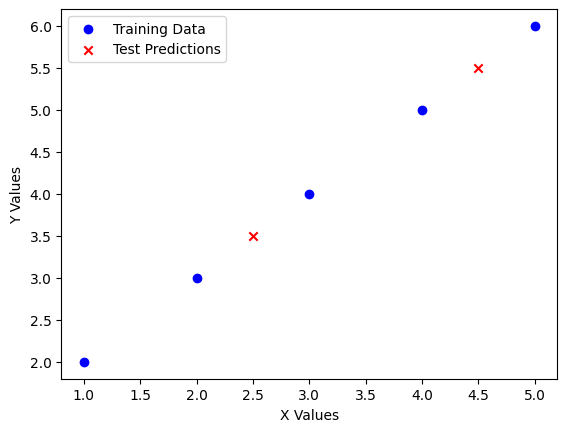

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for illustration
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y_train = np.array([2, 3, 4, 5, 6])
X_test = np.array([[2.5, 3.5], [4.5, 5.5]])

# KNN regression
k = 2

# Make predictions for the test data
predictions = []
for x_test in X_test:
    # Calculate distances between x_test and all data points in X_train
    distances = [np.linalg.norm(x_test - x_train) for x_train in X_train]

    # Sort data points by distance and get the indices of the K nearest neighbors
    k_indices = np.argsort(distances)[:k]

    # Get the target values of the K nearest neighbors
    k_nearest_neighbors = [y_train[i] for i in k_indices]

    # Calculate the regression prediction as the mean of the target values of the K neighbors
    prediction = np.mean(k_nearest_neighbors)
    predictions.append(prediction)

# Plot the training data points
plt.scatter(X_train[:, 0], y_train, label="Training Data", color="blue")

# Plot the test data points and their predictions
plt.scatter(X_test[:, 0], predictions, label="Test Predictions", color="red", marker="x")

plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

## The Abalone Problem Statement

The age of an abalone can be found by cutting its shell and counting the number of rings on the shell. In the Abalone Dataset, you can find the age measurements of a large number of abalones along with a lot of other physical measurements.

The goal of the project is to develop a model that can predict the age of an abalone based purely on the other physical measurements. This would allow researchers to estimate the abalone’s age without having to cut its shell and count the rings.

You’ll be applying a kNN to find the closest prediction score possible.

In [38]:
# Import the dataset

import pandas as pd
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)

In [40]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [41]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

In [42]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [43]:
# Drop the sex column as the goal of this exercise is to use physical measurements to predict the age of the abalone. Sex is not a purely physical measure
abalone = abalone.drop("Sex", axis=1)

In [44]:
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


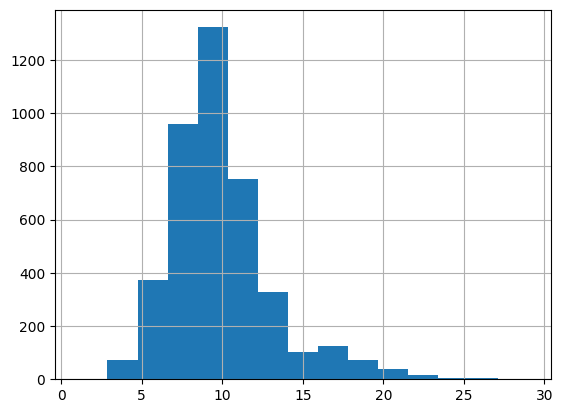

In [49]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

In [50]:
# Find which of the variables, if any, have a strong correlation with age.
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [51]:
# Computing the distance between vectors
import numpy as np
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

2.8284271247461903

## # Find the k Nearest Neighbors

In [52]:
# Generate two objects that contain the data: x and y. Where x is the independent variables and y is the dependent variable of the model
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

In [54]:
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208,
])

In [55]:
# Get the vector distances
distances = np.linalg.norm(X - new_data_point, axis=1)

In [57]:
# Find the indices of the 3 closest neighbors
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids


array([4045, 1902, 1644])

In [58]:
# Find the ground truths for those three neighbors
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10])

In [59]:
# Average for Regression. In regression problems, the target variable is numeric. Combine multiple neighbors into one prediction by taking the average of their valuesof the target variable
prediction = nearest_neighbor_rings.mean()
prediction

10.0

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

In [62]:
# Fitting a kNN Regression in scikit-learn to the Abalone Dataset
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [63]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [64]:
# Compute the RMSE using the model.
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6538366794859511

In [66]:
# Evaluate the RMSE on the data not known by the model
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

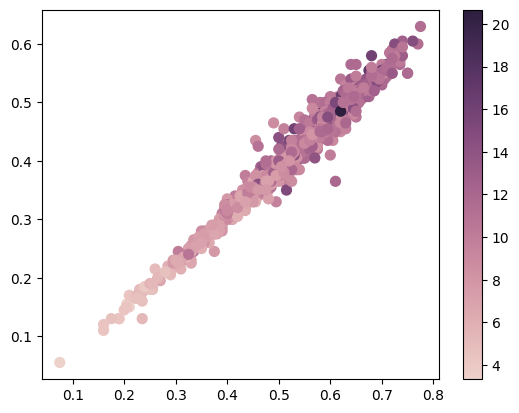

In [67]:
# Plot the fit of the model
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

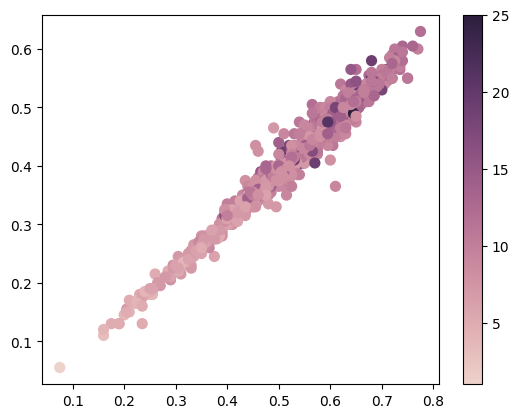

In [77]:
# Plot the fit of the model with test data
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()